<h1 id="Linear-Regression:-Basics">Linear Regression: Basics</h1>
<p><em><strong>Part [1/2]</strong></em></p>
<hr />
<h3 id="Objectives">Objectives</h3>
<ul>
<li>
<p><strong>Create a model</strong> and training it on data.</p>
</li>
<li>
<p>Read the basics from a <em><code>statsmodels</code></em> <strong>model summary.</strong></p>
</li>
<li>
<p>Make <strong>predictions</strong> on the data.</p>
<ul>
<li><em>Learn about <strong>residuals</strong> and simple <strong>regression metrics</strong>.</em></li>
</ul>
</li>
</ul>

In [2]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import mse

In [5]:
# Load in data.
df = pd.read_csv('data/advertising.csv', index_col=0)
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

## EDA
- *Correlation Matrix*

- *Scatterplots*

In [10]:
corr = (
    df.corr().abs().round(5)
)
corr

,TV,radio,newspaper,sales
TV,1.00000,0.05481,0.05665,0.78222
radio,0.05481,1.00000,0.35410,0.57622
newspaper,0.05665,0.35410,1.00000,0.22830
sales,0.78222,0.57622,0.22830,1.00000


C:\Users\CoJoe\AppData\Local\Temp\ipykernel_24996\3037333069.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


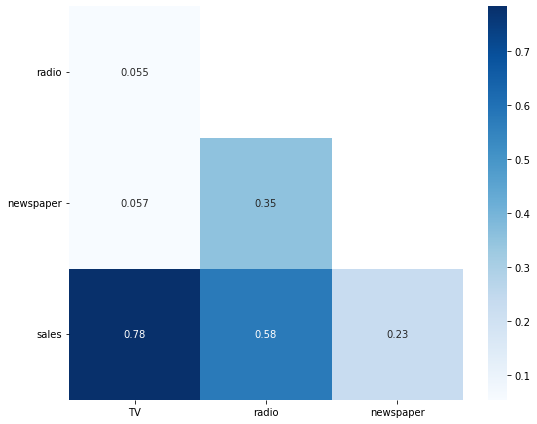

In [11]:
fig, ax = plt.subplots(figsize=(8,6))

# Set a 'mask' for the upper half of the heatmap. 
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, annot=True, mask=mask, cmap='Blues', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=0, ha="center",)
plt.setp(ax.get_yticklabels(), rotation=0)

# Fix the cutoff squares and remove empty row and column. 
ax.set_ylim(len(corr), 1)
ax.set_xlim(xmax=len(corr)-1)

fig.tight_layout()

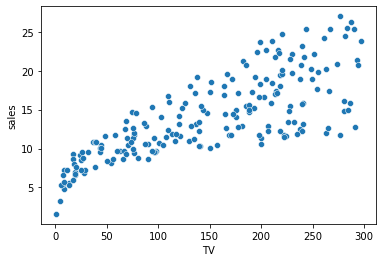

In [12]:
# Scatterplots.
sns.scatterplot(x='TV', y='sales', data=df);

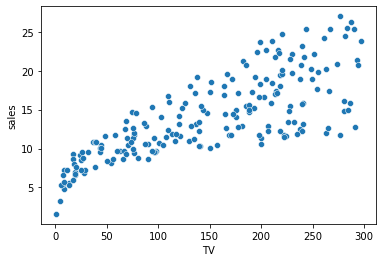

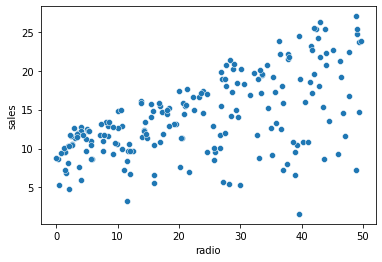

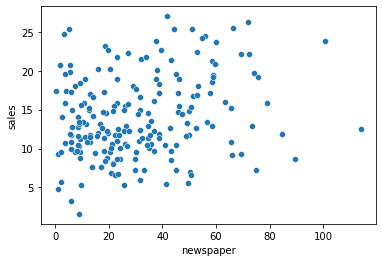

In [13]:
for c in df.columns:
    if c == 'sales':
        continue
    sns.scatterplot(x=c, y='sales', data=df)
    plt.show()

## Modeling

### Train a Model: Simple Linear Regression
> ***One*** *predictive feature.*

In [14]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [16]:
f = 'sales~TV'
model = ols(f, df).fit()
model

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.47e-42
Time:                        16:41:57   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='TV', ylabel='sales'>

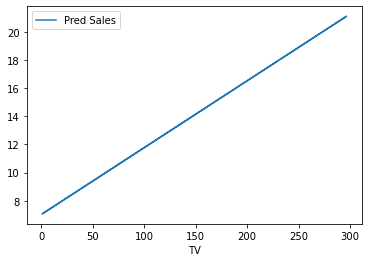

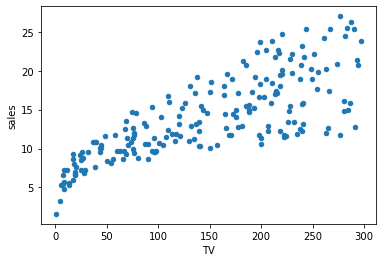

In [26]:
df["Pred Sales"]  = .0475*df["TV"] + 7.0326
df.plot("TV","Pred Sales")
df.plot.scatter("TV","sales")

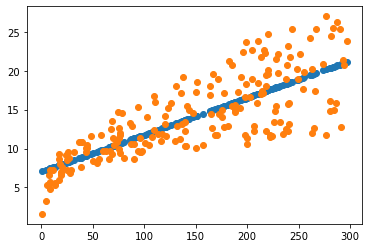

In [28]:
plt.scatter(x=df["TV"],y=df["Pred Sales"])
plt.scatter(x=df["TV"],y=df["sales"])

In [37]:
rmse = np.sqrt(mse(df["sales"],df["Pred Sales"]))
rmse

3.2423281326367173

In [32]:
## create formula
print(df["sales"].mean())
print(df["Pred Sales"].mean())

14.022500000000003
14.017118749999993


In [ ]:
# Predict sales values using TV
y_hat = model.predict(df["TV"])
#np.sqrt(mse(df["sales"],y_hat))


In [ ]:
plt.scatter(x=df["TV"],y=y_hat)
plt.scatter(x=df["TV"],y=df["sales"])

In [38]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales', 'Pred Sales'], dtype='object')

In [39]:
f = 'sales~TV+radio+newspaper'
model = ols(f, df).fit()
model

### Train a Model: Multiple Linear Regression
> ***Multiple*** *predictive features.*

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        17:08:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y = m1x1 + m2x2 + m3x3 + b

In [41]:
# Let the model predict our y values for us
y_hat = model.predict(df[["TV","radio","newspaper"]])

In [46]:
np.sqrt(mse(df["sales"],y_hat))

1.6685701407225697

In [45]:
df[["TV","radio","newspaper"]]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


## Fishees

In [52]:
fish = pd.read_csv("data/Fish.csv")
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [68]:
species = fish["Species"].unique()
species

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [74]:
for spec in species:
    f="Weight~Length1+Length2+Length3+Height+Width"
    temp = fish.loc[fish["Species"] == spec]
    model = ols(f, temp).fit()
    y_hat = model.predict(temp[["Length1","Length2","Length3","Height","Width"]])
    rmse = np.sqrt(mse(temp["Weight"],y_hat))
    print(spec,rmse,temp.shape[0],temp["Weight"].mean(),rmse/temp["Weight"].mean())
    temp["Pred"] = y_hat
#    print(temp.head())
    
#    temp.plot.scatter("Weight","Pred")

Bream 49.117349997787315 35 617.8285714285714 0.07949996531273382
Roach 31.440924483074856 20 152.05 0.20678016759667775
Whitefish 4.0694171404897305e-11 6 531.0 7.663685763634145e-14
Parkki 7.350088211034921 11 154.8181818181818 0.047475613811734665
Perch 82.30702917560932 56 382.23928571428576 0.2153285448454185
Pike 56.995990504281714 17 718.7058823529412 0.07930363713969464
Smelt 0.5417367904977188 14 11.17857142857143 0.048462077105227236


C:\Users\CoJoe\AppData\Local\Temp\ipykernel_24996\1582333367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Pred"] = y_hat
C:\Users\CoJoe\AppData\Local\Temp\ipykernel_24996\1582333367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Pred"] = y_hat
C:\Users\CoJoe\AppData\Local\Temp\ipykernel_24996\1582333367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum